## Problem 1
---

In [1]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

# We can generate the plus and minus vectors via two different ways. 
# 1. Implementing an H gate on the |0> and |1> vectors, respectively
# 2. Calling directly from Statevector.from_label("+") and .from_label("-") 

# Method 1 ---------------
ket0 = Statevector([1, 0]) # We could also say ket0 = Statevector.from_label("0")
ket1 = Statevector([0, 1]) 

circuit_with_a_hadamard_gate = QuantumCircuit(1)
circuit_with_a_hadamard_gate.h(0)
circuit_with_a_hadamard_gate.draw()

┌───┐
q: ┤ H ├
   └───┘

In [2]:
plus = ket0.evolve(circuit_with_a_hadamard_gate)
minus = ket1.evolve(circuit_with_a_hadamard_gate)

display(plus.draw("latex"))
display(minus.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
# Method 2 -----------------------
plus = Statevector.from_label("+")
minus = Statevector.from_label("-")

display(plus.draw("latex"))
display(minus.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|+>


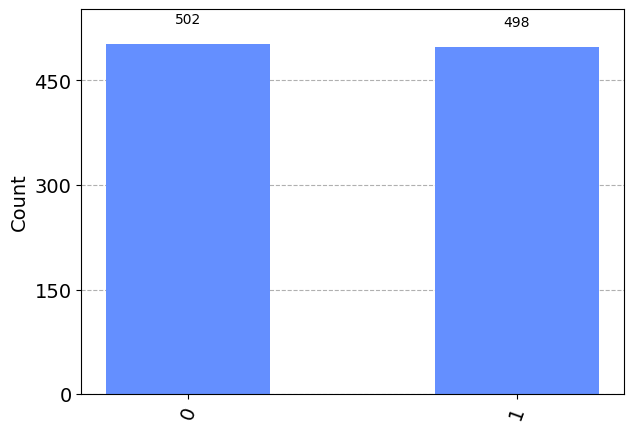

|->


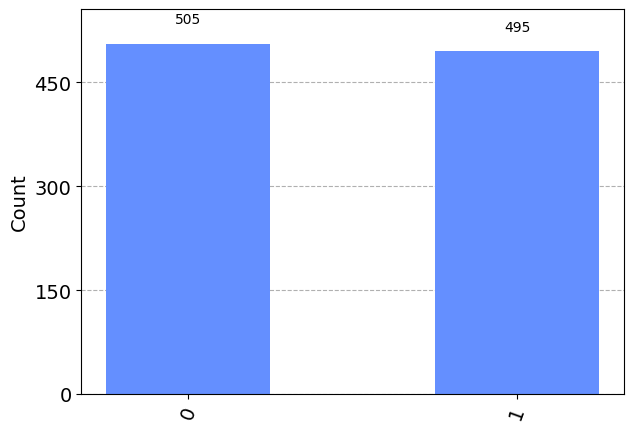

In [7]:
from qiskit.visualization import plot_histogram

plus_stats = plus.sample_counts(1000)
minus_stats = minus.sample_counts(1000)

print("|+>")
display(plot_histogram(plus_stats))

print("|->")
display(plot_histogram(minus_stats))

## Problem 2
---

Let's define a `QuantumCircuit` with one Hadamard Gate. 

In [17]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)

circuit.draw()

┌───┐
q: ┤ H ├
   └───┘

In [20]:
ket0 = Statevector([1, 0]) # or you could call ket0 = Statevector.from_label("0")
ket0.draw('latex')

<IPython.core.display.Latex object>

Let's implement the circuit *once* (one Hadamard gate) on $|0\rangle$ and see the result. 

In [21]:
display(ket0.evolve(circuit).draw("latex"))

<IPython.core.display.Latex object>

We get the $|+\rangle$ as expected. Now let's run this new statevector back through the circuit. (This is the same as applying a Hadamard gate twice on $|0\rangle$).

In [23]:
plus = ket0.evolve(circuit)

display(plus.evolve(circuit).draw("latex"))

<IPython.core.display.Latex object>

We see that applying two Hadamard gates to the $|0\rangle$ statevector re-yields $|0\rangle$.

## Problem 3
---

Recall that a Phase operation is given by 

$$ P_\theta \equiv \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix} $$

Therefore, $P_{\pi/3}$


$$ P_{\pi/3} \equiv \begin{pmatrix} 1 & 0 \\ 0 & e^{i \pi/3} \end{pmatrix} $$

Let's define this operator in Qiskit. 

In [33]:
from qiskit.quantum_info import Operator
import math

ket1 = Statevector([0, 1]) # or you could call Statevector.from_label("1")
PhasePi3 = Operator([[1, 0], [0, math.cos(math.pi / 3) + 1j * math.sin(math.pi / 3)]]) # using Euler's formula

display(ket1.evolve(PhasePi3).draw("latex"))

<IPython.core.display.Latex object>